# Заполнение пропусков в данных

При работе с данными мы часто встречаемся с пропущенными значениями. Как их можно обрабатывать?



1.   Удалить строки, содержащие пропущенные значения. Это выполнить не сложно, но при удалении некоторых строк теряется часть информации.
2.   Заполнить пропущенные значения статистическими характеристиками присутствующих данных:
  1. наиболее частым значением (подходит для категориальных признаков);
  2. средним (медиана) по всем данным - подходит не для всех данных.
3. Заполнить пропущенные значения на основании соседних непустых значений (интерполяция). 
  1. Среднее (медиана) - понятие рассмотрено на предыдущем семинаре.
  2. *Линейная интерполяция.*

## Задача

Необходимо построить линейный график по количеству вакцинированных от covid-19 в России в зависимости от даты.
Данные можно скачать по [ссылке](https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations.csv).

In [ ]:
!wget -O "vaccinations.csv" "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"

--2021-11-24 09:31:12--  https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4860478 (4.6M) [text/plain]
Saving to: ‘vaccinations.csv’

vaccinations.csv    100%[===================>]   4.63M  --.-KB/s    in 0.1s    

2021-11-24 09:31:12 (47.7 MB/s) - ‘vaccinations.csv’ saved [4860478/4860478]



### Решение

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
total_vaccinations_rus = []
with open("vaccinations.csv", 'r') as file:
    for i in file.readlines()[1:]:
        line = i.strip().split(',')
        if line[1] == 'RUS':
          date = line[2]
          if line[3] != '':
            vacc = int(line[3])
          else:
            vacc = -1
          total_vaccinations_rus.append([date, vacc])
print(total_vaccinations_rus)

[['2020-12-15', 28500], ['2020-12-16', -1], ['2020-12-17', -1], ['2020-12-18', -1], ['2020-12-19', -1], ['2020-12-20', -1], ['2020-12-21', -1], ['2020-12-22', 52000], ['2020-12-23', -1], ['2020-12-24', -1], ['2020-12-25', -1], ['2020-12-26', -1], ['2020-12-27', -1], ['2020-12-28', -1], ['2020-12-29', -1], ['2020-12-30', -1], ['2020-12-31', -1], ['2021-01-01', -1], ['2021-01-02', 800000], ['2021-01-03', -1], ['2021-01-04', -1], ['2021-01-05', -1], ['2021-01-06', -1], ['2021-01-07', -1], ['2021-01-08', -1], ['2021-01-09', -1], ['2021-01-10', -1], ['2021-01-11', -1], ['2021-01-12', -1], ['2021-01-13', 1000000], ['2021-01-14', -1], ['2021-01-15', -1], ['2021-01-16', -1], ['2021-01-17', -1], ['2021-01-18', -1], ['2021-01-19', -1], ['2021-01-20', -1], ['2021-01-21', -1], ['2021-01-22', -1], ['2021-01-23', -1], ['2021-01-24', -1], ['2021-01-25', -1], ['2021-01-26', -1], ['2021-01-27', -1], ['2021-01-28', -1], ['2021-01-29', -1], ['2021-01-30', -1], ['2021-01-31', -1], ['2021-02-01', -1], ['20

In [ ]:
# Делаем то же самое с помощью numpy

with open("vaccinations.csv", 'r') as file:
  vacc_table = np.genfromtxt(file, delimiter=',', dtype=str, skip_header=1, usecols=(1, 2, 3))
  vacc_table_rus = filter(lambda x: x[0]=='RUS', vacc_table)

country, dates, vacc_rus = np.transpose(list(vacc_table_rus))
vacc_rus = list(map(lambda x: int(x) if x!= '' else -1, vacc_rus))
print(vacc_rus)


[28500, -1, -1, -1, -1, -1, -1, 52000, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 800000, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1000000, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 5249831, 5489342, 6010744, 6301854, 6583873, 6655487, 6669466, 6694349, 7048129, 7273933, -1, -1, -1, -1, -1, 7818009, 7909438, 8185944, 8306498, 8362575, -1, -1, -1, -1, -1, -1, -1, 11124350, 11183108, 11373572, 11642295, 11779295, 12038859, 12120810, 12215342, 12474954, 13047800, 13354502, 13628879, 13977397, 14108341, 14269543, 14583881, 14967802, 15164099, 15469617, 15700803, 16167151, 16237319, 16567842, 16821267, 17218313, 17535826, 18080498, 18152707, 18315316, 18557064, 19043771, 19523861, 19834392, 19934399, 20070743, 20110554, 20168443, 20720147, 21177713, 21296747, 21597074, -1, 21786131, 21844382, 22575945, 22782931, 23292045, 23858201, 23970334, 24087535,

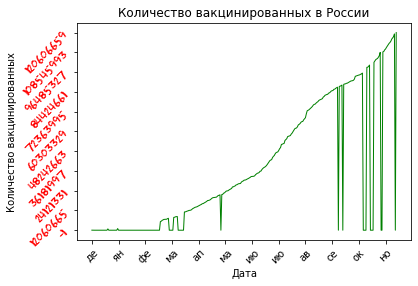

In [ ]:
xname = "Дата"
yname="Количество вакцинированных"
title = "Количество вакцинированных в России"

plt.xlabel(xname)
plt.ylabel(yname)
plt.title(title)

tick_values = list(range(0, 365, 30))
tick_names = ['декабрь', 'январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь' ]
tick_names_new = [elem[:2] for elem in tick_names]
plt.xticks(tick_values, tick_names_new, rotation =45)

step = (max(vacc_rus)-min(vacc_rus))//10

tick_values_y = list(range(min(vacc_rus), max(vacc_rus), step))
plt.yticks(tick_values_y, tick_values_y, rotation=45, fontfamily='fantasy', fontsize='large', color='red')

plt.plot(dates, vacc_rus, linewidth=1, color='green')
plt.show()

У нас есть предположение, что данные изменяются линейно.

В numpy есть для этого метод linspace - он заполняет указанное число точек.

Мы можем заполнить все значения исходя из первого и последнего значения:

In [ ]:
vacc_rus_approx = np.linspace(vacc_rus[0], vacc_rus[-1], len(vacc_rus))
print(*vacc_rus_approx)

28500.0 381067.73976608185 733635.4795321637 1086203.2192982456 1438770.9590643274 1791338.6988304092 2143906.4385964912 2496474.178362573 2849041.918128655 3201609.6578947366 3554177.3976608184 3906745.1374269 4259312.8771929825 4611880.616959064 4964448.356725146 5317016.096491228 5669583.83625731 6022151.576023391 6374719.315789473 6727287.055555555 7079854.795321637 7432422.535087719 7784990.2748538 8137558.014619882 8490125.754385965 8842693.494152047 9195261.233918129 9547828.97368421 9900396.713450292 10252964.453216374 10605532.192982456 10958099.932748538 11310667.67251462 11663235.412280701 12015803.152046783 12368370.891812865 12720938.631578946 13073506.371345028 13426074.11111111 13778641.850877192 14131209.590643274 14483777.330409355 14836345.070175437 15188912.809941519 15541480.5497076 15894048.289473683 16246616.029239764 16599183.769005846 16951751.50877193 17304319.24853801 17656886.988304093 18009454.728070173 18362022.467836257 18714590.207602337 19067157.94736842

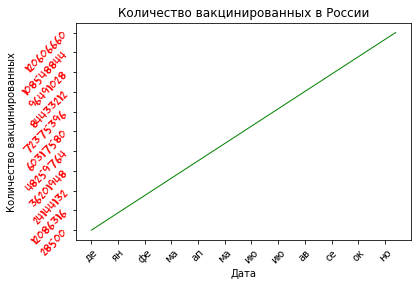

In [ ]:
#Визуализируем аппроксимированный график

xname = "Дата"
yname="Количество вакцинированных"
title = "Количество вакцинированных в России"

plt.xlabel(xname)
plt.ylabel(yname)
plt.title(title)

tick_values = list(range(0, 365, 30))
tick_names = ['декабрь', 'январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь' ]
tick_names_new = [elem[:2] for elem in tick_names]
plt.xticks(tick_values, tick_names_new, rotation =45)

vacc_rus_approx_min = int(min(vacc_rus_approx))
vacc_rus_approx_max = int(max(vacc_rus_approx))
step = (vacc_rus_approx_max-vacc_rus_approx_min)//10



tick_values_y = list(range(vacc_rus_approx_min, vacc_rus_approx_max, step))
plt.yticks(tick_values_y, tick_values_y, rotation=45, fontfamily='fantasy', fontsize='large', color='red')

plt.plot(dates, vacc_rus_approx, linewidth=1, color='green')
plt.show()

Это не очень хорошо.
Потому что исходные графики вели себя не постоянно линейно. Были различные выбросы.
Поэтому мы можем применить linspace для заполнения пропусков между двумя соседними непропущенными значениями.
При этом мы предполагаем, что данные в незаполненных промежутках ведут себя линейно.

Как это сделать?

1. Ищем индекс первого непустого элемента.
2. Ищем индекс второго непустого элемента, начиная с текущего индекса.
3. Заполняем промежутки с помощью linspace, указав при этом индекс начала, конца и количество точек (его надо посчитать).

In [ ]:
# Функция поиска индекса первого отрицательного значения в списке, начиная с текущего индекса
def find_first_na_idx(lst, first_idx):
  for idx in range(first_idx, len(lst)):
    if lst[idx]==-1:
      return idx
  return -1

In [ ]:
# Функция поиска индекса первого НЕОТРИЦАТЕЛЬНОГО значения в списке, начиная с текущего индекса
def find_first_not_na_idx(lst, first_idx):
  for idx in range(first_idx, len(lst)):
    if lst[idx]!=-1:
      return idx
  return -1

In [ ]:
vacc_rus_approx = vacc_rus
idx=0
while idx>=0 and idx<len(vacc_rus):
  idx_na = find_first_na_idx(vacc_rus, idx)
  if idx<0 or idx>=len(vacc_rus):
    break
  idx_not_na = find_first_not_na_idx(vacc_rus, idx_na)
  vacc_rus_approx[idx:idx_na] = vacc_rus[idx:idx_na]
  vacc_rus_approx[idx_na:idx_not_na] = np.linspace(vacc_rus[idx_na-1], vacc_rus[idx_not_na], idx_not_na-idx_na)
  idx = idx_not_na

print(vacc_rus_approx)


[28500, 28500.0, 33200.0, 37900.0, 42600.0, 47300.0, 52000.0, 52000, 52000.0, 135111.11111111112, 218222.22222222222, 301333.3333333333, 384444.44444444444, 467555.55555555556, 550666.6666666666, 633777.7777777778, 716888.8888888889, 800000.0, 800000, 800000.0, 822222.2222222222, 844444.4444444445, 866666.6666666666, 888888.8888888889, 911111.1111111111, 933333.3333333334, 955555.5555555555, 977777.7777777778, 1000000.0, 1000000, 1000000.0, 1092387.6304347827, 1184775.2608695652, 1277162.891304348, 1369550.5217391304, 1461938.152173913, 1554325.7826086958, 1646713.4130434783, 1739101.0434782607, 1831488.6739130435, 1923876.3043478262, 2016263.9347826086, 2108651.5652173916, 2201039.195652174, 2293426.8260869565, 2385814.4565217393, 2478202.0869565215, 2570589.7173913047, 2662977.347826087, 2755364.9782608696, 2847752.6086956523, 2940140.2391304346, 3032527.8695652173, 3124915.5, 3217303.1304347827, 3309690.7608695654, 3402078.3913043477, 3494466.0217391304, 3586853.652173913, 3679241.2

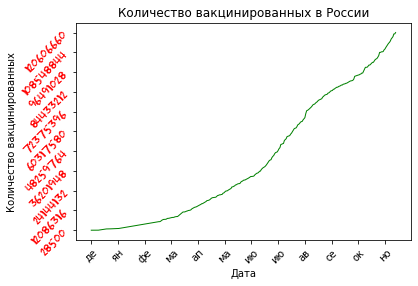

In [ ]:
#Визуализируем аппроксимированный график

xname = "Дата"
yname="Количество вакцинированных"
title = "Количество вакцинированных в России"

plt.xlabel(xname)
plt.ylabel(yname)
plt.title(title)

tick_values = list(range(0, 365, 30))
tick_names = ['декабрь', 'январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь' ]
tick_names_new = [elem[:2] for elem in tick_names]
plt.xticks(tick_values, tick_names_new, rotation =45)

vacc_rus_approx_min = int(min(vacc_rus_approx))
vacc_rus_approx_max = int(max(vacc_rus_approx))
step = (vacc_rus_approx_max-vacc_rus_approx_min)//10



tick_values_y = list(range(vacc_rus_approx_min, vacc_rus_approx_max, step))
plt.yticks(tick_values_y, tick_values_y, rotation=45, fontfamily='fantasy', fontsize='large', color='red')

plt.plot(dates, vacc_rus_approx, linewidth=1, color='green')
plt.show()

# Задача
Заполнение пропусков помогает также приводить данные к адекватному виду.

Рассмотрим набор данных про пассажиров Титаника (вы уже видели его ранее).

Однако в прошлый раз мы забыли закрыть доступ на его редактирование, и какой-то хакер решил нам насолить и испортил исходные данные.

Мы проанализировали их и увидели, что данные были испорчены не очень сильно.
Злоумышленник только исковеркал названия колонок, поменяв у некоторых букв размер и добавил лишние символы "_", "." и ";", а также стёр некоторые данные в отдельных столбцах.

Ваша задача - исправить данные:
1. Привести названия колонок к единому виду, убрать лишние символы.
2. Указать все названия колонок, где содержались пропуски, и подумать, как их можно исправить.

При выполнении задания разрешается пользоваться всеми материалами с лекций и семинаров.

Результат стоит записать в новый файл output.txt.

# Решение

1. Читаем файл (или с помощью read, или с помощью np.genfromtxt).
2. Обрабатываем первую строку - названия колонок.
  1. Читаем её из файла.
  2. К каждому элементу применяем replace, title.
3. Получаем значения каждой колонки (можно сделать numpy.transpose, можно просто вручную заполнить содержимое колонок).
4. Ищем хотя бы одно пустое значение. Это можно сделать с помощью цикла, find.
  1. Если пустое значение нашлось - сохраняем значение колонки (или ее индекс). 
5. Анализируем каждую колонку, содержащую пустые значения.
  1. Для категориальной - вспоминаем частотный анализ.
  2. Для числовой - вспоминаем сегодняшнюю и предыдущую лекцию.



In [ ]:
!wget -O "titanic_corrupted.csv" "https://raw.githubusercontent.com/legas377/TestRepository/main/titanic_corrupted.csv"

--2021-11-24 08:51:41--  https://raw.githubusercontent.com/legas377/TestRepository/main/titanic_corrupted.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26244 (26K) [text/plain]
Saving to: ‘titanic_corrupted.csv’

titanic_corrupted.c 100%[===================>]  25.63K  --.-KB/s    in 0.002s  

2021-11-24 08:51:41 (10.1 MB/s) - ‘titanic_corrupted.csv’ saved [26244/26244]



In [ ]:
with open('titanic_corrupted.csv') as in_file:
    lines = in_file.readlines()
    lst = [line.replace('\n', '').split(',') for line in lines]
print(lst[0])

['PassEngEr_Id', 'PclaSS;-', 'NAME', 'SEX', 'age .', 'Sib_Sp', 'PaRch__', 'TickEt', 'Fare', 'cabin', 'Embarked::']


In [ ]:
# Предобрабатываем названия колонок
def column_name_preprocess(col_name):
    for char in ['_', ';', '-', ' ', '.', ':']:
        col_name = col_name.replace(char, '')
    return col_name

column_names = lst[0]
column_names = [column_name_preprocess(col_name).title() for col_name in column_names]
print(column_names)

['Passengerid', 'Pclass', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
# Получаем список содержимого колонок:
import numpy as np

data_lst = lst[1:] # Пропускаем первую строку
columns_lst = np.transpose(data_lst)
print(len(columns_lst))

11


In [ ]:
# Проверяем, содержит ли колонка пустые значения
def check_is_na(column):
    for elem in column:
        if elem=='':
            return True
    return False

# Выводим названия колонок, содержащих пропуски
for i in range(len(columns_lst)):
    if check_is_na(columns_lst[i]):
        print(i, column_names[i])

0 Passengerid
1 Pclass
2 Name
3 Sex
4 Age
8 Fare
9 Cabin


Должно быть выведено:
Passengerid
Pclass
Name
Sex
Age
Fare
Cabin

**Какие из этих колонок категориальные, а какие числовые?**

Категориальные колонки:  Pclass (значения - числа, но количество разных чисел - конечно, всего 3 класса), Name, Sex, Cabin.

Числовые признаки: Passengerid, Age, Fare.

**Как можно заполнить пропуски?**

Pclass - заменяем самым частым (было ранее на семинаре).

Name - можно не заполнять (имя нас особо не интересует).

Sex - заполняем исходя из имени (Mrs., Miss - female, Mr. - male). Если имени нет - пока не заполняем.

Passengerid - можно линейно заполнить.

Age, fare - можно средним.

In [ ]:
# Заполняем Passengerid
columns_lst[0] = np.linspace(int(columns_lst[0][0]), int(columns_lst[0][-1]), len(columns_lst[0]))

In [ ]:
# Заполняем Pclass - уже было на семинаре

from collections import Counter

pclasses = columns_lst[1]
pclasses_filter = filter(lambda x: x != '', pclasses)
how_much_pclasses = Counter(pclass for pclass in pclasses_filter)
most_frequent_pclass = how_much_pclasses.most_common()[0][0]

columns_lst[1] = [elem if elem!='' else most_frequent_pclass for elem in pclasses]

In [ ]:
# Name - пропускаем

In [ ]:
# Заполняем пол, исходя из имени
def get_sex_from_name(name):
    if 'Mr.' in name:
        return 'male'
    elif 'Mrs.' in name or 'Miss.' in name:
        return 'female'
    else:
        return ''

sex_lst = []
for name, sex in zip(columns_lst[2], columns_lst[3]):
    if sex!='':
        sex_lst.append(sex)
    else:
        sex_lst.append(get_sex_from_name(name))

# Для незаполненных значений пола - заполняем самым частым значением

sex_lst_filter = filter(lambda x: x != '', sex_lst)
how_much_sexes = Counter(sex for sex in sex_lst_filter)
most_frequent_sex = how_much_sexes.most_common()[0][0]

columns_lst[3] = [elem if elem != '' else most_frequent_sex for elem in sex_lst]

In [ ]:
# Age - заполняем средним

ages = columns_lst[4]

ages_filter = filter(lambda x: x!='', ages)

ages_float = [float(age) for age in ages_filter]
ages_mean = np.mean(ages_float)

columns_lst[4] = [elem if elem != '' else str(ages_mean) for elem in ages]

In [ ]:
# Fare - аналогично

fares = columns_lst[8]

fares_filter = filter(lambda x: x != '', fares)

fares_float = [float(fare) for fare in fares_filter]
fares_mean = np.mean(fares_float)

columns_lst[8] = [elem if elem != '' else str(fares_mean) for elem in fares]

In [ ]:
# Cabin - пропускаем

In [ ]:
# Сохраняем результат

with open('titanic_preprocessed.csv', 'w') as out_file:
    # Записываем названия колонок
    print(*column_names, sep=',', file=out_file)
    # Записываем содержимое колонок
    rows = np.transpose(columns_lst)
    for row in rows:
        print(*row, sep=',', file=out_file)